In [131]:
!pip install --upgrade pip
!pip install -r ../requirements.txt

In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [156]:
df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv')

In [134]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [135]:
df_raw.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [136]:
df_raw.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [157]:
# create a new dataframe with only the 'latitude','longitude' and 'medincome' column

df = df_raw[['Latitude', 'Longitude', 'MedInc']].copy()
df_i = df.copy()

df_i.to_csv('../data/df_data.csv')

In [138]:
df.head(10)

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462
5,37.85,-122.25,4.0368
6,37.84,-122.25,3.6591
7,37.84,-122.25,3.1200
8,37.84,-122.26,2.0804
9,37.84,-122.25,3.6912


In [158]:
# re-scale because of the algorithm is affected by features with great difference in scales

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_s = df_scaled.copy()

In [140]:
# Elbow method for optimal k

lst = []
k = range(2,15)
for i in k:
  model = KMeans(n_clusters=i)
  model.fit(df_scaled)
  inertia = model.inertia_
  lst.append(inertia)
  print(f'Inertia for n_clusters = {i}: {inertia} \n')

Inertia for n_clusters = 2: 26860.97934722158 

Inertia for n_clusters = 3: 18986.958005426994 

Inertia for n_clusters = 4: 14547.473715805629 

Inertia for n_clusters = 5: 11838.576181156888 

Inertia for n_clusters = 6: 10038.550694321928 

Inertia for n_clusters = 7: 8731.74076109879 

Inertia for n_clusters = 8: 7713.829637639559 

Inertia for n_clusters = 9: 7020.256231667329 

Inertia for n_clusters = 10: 6403.010608599243 

Inertia for n_clusters = 11: 5896.20671760531 

Inertia for n_clusters = 12: 5404.8989097172125 

Inertia for n_clusters = 13: 5062.961396315026 

Inertia for n_clusters = 14: 4793.317353275069 



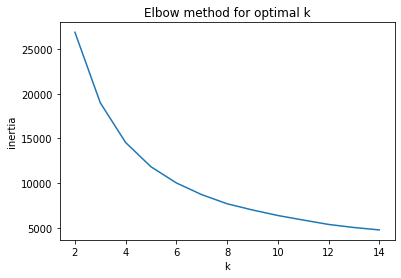

In [141]:
plt.plot(k,lst)
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Elbow method for optimal k')
plt.show()

In [142]:
# visible elbow at 6, k we are asked to use

In [143]:
#  create 6 housing clusters based only on their 'latitude','longitude' and their 'medincome' column.

In [159]:
km_6 = KMeans(n_clusters=6, random_state=42)
km_6.fit(df_scaled)

KMeans(n_clusters=6, random_state=42)

In [145]:
# create a new 'cluster' feature

df_inv = scaler.inverse_transform(df_scaled)
df_inv = pd.DataFrame(df_inv,columns=['Latitude','Longitude','MedInc'])
df_inv['Cluster'] = km_6.labels_

In [146]:
df_inv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   20640 non-null  float64
 1   Longitude  20640 non-null  float64
 2   MedInc     20640 non-null  float64
 3   Cluster    20640 non-null  int32  
dtypes: float64(3), int32(1)
memory usage: 564.5 KB


In [147]:
df_inv.sample(10)

,Latitude,Longitude,MedInc,Cluster
7953,33.87,-118.15,3.0685,4
7279,33.98,-118.25,1.6667,4
2199,36.83,-119.87,5.1781,3
3350,40.65,-120.77,1.7214,2
6736,34.13,-118.10,15.0001,5
14821,32.67,-117.11,1.7961,4
4384,34.09,-118.27,2.9709,4
13857,34.50,-117.27,6.0296,1
20469,34.27,-118.73,4.5560,1
17507,37.35,-121.90,3.2500,2


In [148]:
df_inv['Cluster'].value_counts()

4    6683
2    4828
1    4113
3    2813
0    1659
5     544
Name: Cluster, dtype: int64

In [149]:
x = df_i.values
y_clusters = km_6.fit_predict(x)

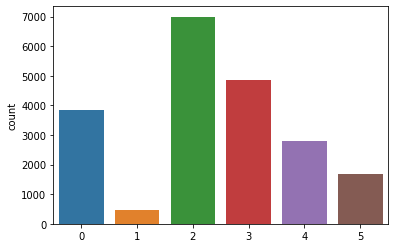

In [150]:
sns.countplot(x = y_clusters)
plt.show()

In [151]:
# Convert 'cluster' column to 'category' type

df_inv['Cluster'] = pd.Categorical(df_inv.Cluster)

In [152]:
print(f'Inertia for the model: {km_6.inertia_}')

Inertia for the model: 39488.537833215145


In [153]:
x = df_i.values
y = km_6.fit_predict(x)

sil_score = silhouette_score(x,y)
print(f'Silhouette score for the model: {sil_score}')

Silhouette score for the model: 0.39921715268110103


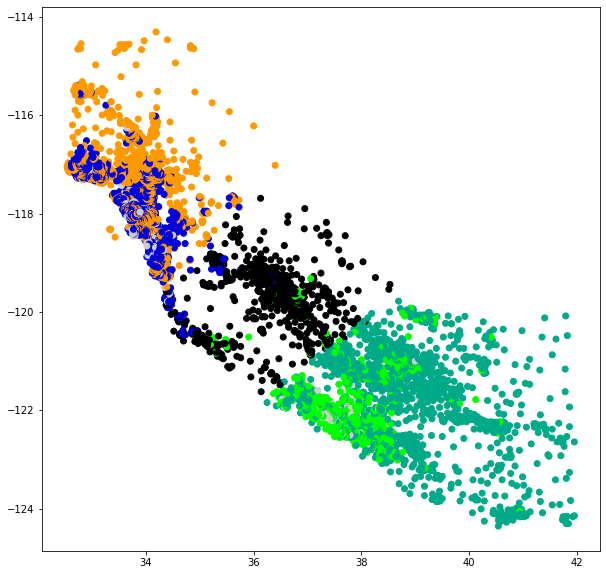

In [154]:
plt.figure(figsize = (10,10))
plt.scatter(df_inv['Latitude'], df_inv['Longitude'], c=df_inv['Cluster'], cmap=plt.cm.nipy_spectral)
plt.show()

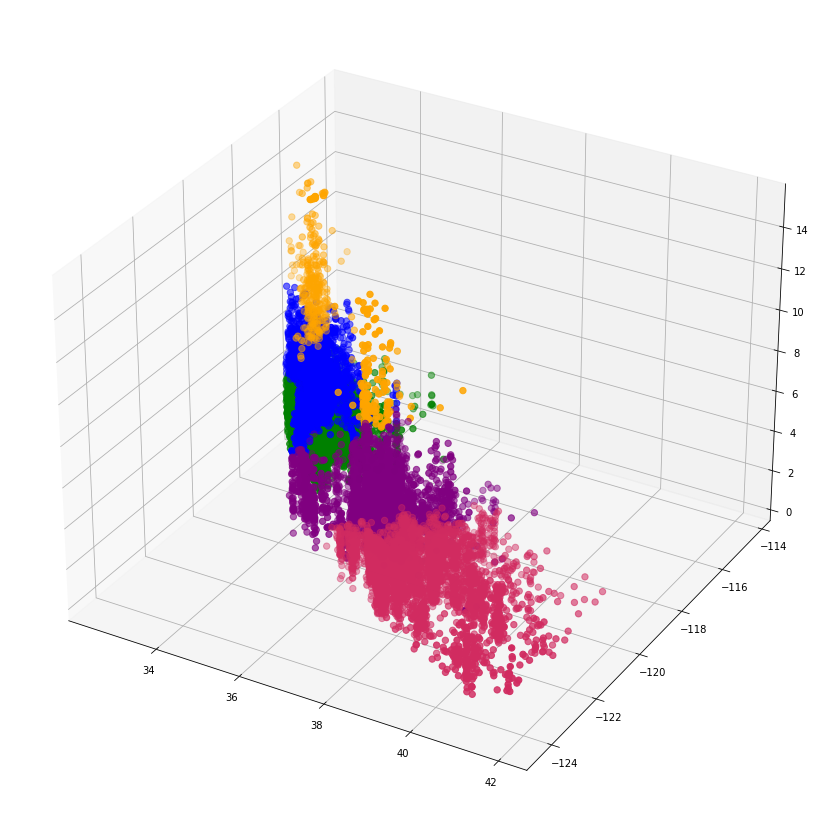

In [155]:
# source: https://www.kaggle.com/code/naren3256/kmeans-clustering-and-cluster-visualization-in-3d/notebook

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],x[y_clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],x[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],x[y_clusters == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(x[y_clusters == 3,0],x[y_clusters == 3,1],x[y_clusters == 3,2], s = 40 , color = '#D12B60', label = "cluster 3")
ax.scatter(x[y_clusters == 4,0],x[y_clusters == 4,1],x[y_clusters == 4,2], s = 40 , color = 'purple', label = "cluster 4")
ax.scatter(x[y_clusters == 5,0],x[y_clusters == 5,1],x[y_clusters == 5,2], s = 40 , color = 'purple', label = "cluster 5")
plt.show()